<a href="https://colab.research.google.com/github/snehasaran09/Object-Recognition-/blob/main/Project2_Object_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Required Libraries 

In [22]:
import tensorflow as tf 
from keras.utils import np_utils
from matplotlib import pyplot as plt
import numpy as np 
import keras 
from keras.models import Sequential 
from keras.layers import Dense , Conv2D , Dropout , MaxPool2D, Flatten

Importing and Splitting the Dataset

In [14]:
(x_train , y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [15]:
print('Training Images: {}'.format(x_train.shape))
print('Testing Images: {}'.format(x_test.shape))

Training Images: (50000, 32, 32, 3)
Testing Images: (10000, 32, 32, 3)


In [16]:
print(x_train[0].shape)

(32, 32, 3)


In [17]:
print(y_train)

[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]


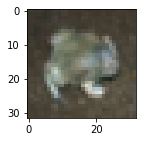

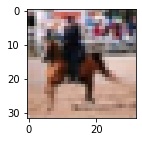

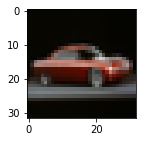

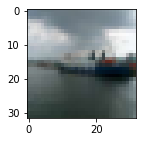

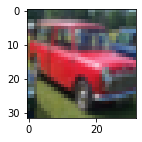

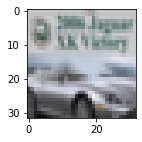

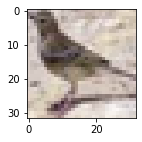

In [18]:
for i in range(132,139):
  plt.subplots(figsize=(2,2))
  img = x_train[i]
  plt.imshow(img)

Pre-Processing the Dataset

In [19]:
x_train = x_train.reshape(x_train.shape[0], 32, 32, 3)
x_test = x_test.reshape(x_test.shape[0], 32, 32, 3)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /=255
x_test /=255
print(x_train)

[[[[0.23137255 0.24313726 0.24705882]
   [0.16862746 0.18039216 0.1764706 ]
   [0.19607843 0.1882353  0.16862746]
   ...
   [0.61960787 0.5176471  0.42352942]
   [0.59607846 0.49019608 0.4       ]
   [0.5803922  0.4862745  0.40392157]]

  [[0.0627451  0.07843138 0.07843138]
   [0.         0.         0.        ]
   [0.07058824 0.03137255 0.        ]
   ...
   [0.48235294 0.34509805 0.21568628]
   [0.46666667 0.3254902  0.19607843]
   [0.47843137 0.34117648 0.22352941]]

  [[0.09803922 0.09411765 0.08235294]
   [0.0627451  0.02745098 0.        ]
   [0.19215687 0.10588235 0.03137255]
   ...
   [0.4627451  0.32941177 0.19607843]
   [0.47058824 0.32941177 0.19607843]
   [0.42745098 0.28627452 0.16470589]]

  ...

  [[0.8156863  0.6666667  0.3764706 ]
   [0.7882353  0.6        0.13333334]
   [0.7764706  0.6313726  0.10196079]
   ...
   [0.627451   0.52156866 0.27450982]
   [0.21960784 0.12156863 0.02745098]
   [0.20784314 0.13333334 0.07843138]]

  [[0.7058824  0.54509807 0.3764706 ]
   [0.6

In [21]:
n_classes = 10
print('shape before one hot encoding - ',y_train.shape)
y_train = np_utils.to_categorical(y_train, n_classes)
y_test = np_utils.to_categorical(y_test, n_classes)
print('shape after one hot encoding - ',y_train.shape)

shape before one hot encoding -  (50000, 1)
shape after one hot encoding -  (50000, 10)


Building The CNN Model

In [24]:
model = Sequential()
#convolutional layers
model.add(Conv2D(50, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(Conv2D(75, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())

#hidden layer 
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.3))

#output layer
model.add(Dense(10,activation='softmax'))

#compiling
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

Training The Model

In [25]:
model.fit(x_train, y_train, batch_size=128, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
391/391 [==============================] - 417s 1s/step - loss: 1.4831 - accuracy: 0.4620 - val_loss: 1.1036 - val_accuracy: 0.6099
Epoch 2/10
391/391 [==============================] - 418s 1s/step - loss: 1.0621 - accuracy: 0.6256 - val_loss: 0.9380 - val_accuracy: 0.6712
Epoch 3/10
391/391 [==============================] - 418s 1s/step - loss: 0.8964 - accuracy: 0.6864 - val_loss: 0.8786 - val_accuracy: 0.6971
Epoch 4/10
391/391 [==============================] - 418s 1s/step - loss: 0.7743 - accuracy: 0.7273 - val_loss: 0.8608 - val_accuracy: 0.6996
Epoch 5/10
391/391 [==============================] - 419s 1s/step - loss: 0.6686 - accuracy: 0.7659 - val_loss: 0.8356 - val_accuracy: 0.7100
Epoch 6/10
391/391 [==============================] - 419s 1s/step - loss: 0.5734 - accuracy: 0.7986 - val_loss: 0.8631 - val_accuracy: 0.7110
Epoch 7/10
391/391 [==============================] - 419s 1s/step - loss: 0.4874 - accuracy: 0.8305 - val_loss: 0.8550 - val_accuracy: 0.7148

Making Prediction 

In [26]:
classes = range(0,10)
names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
class_labels = dict(zip(classes, names))
batch = x_test[100:109]
labels = np.argmax(y_test[100:109], axis=-1)
predictions = model.predict(batch, verbose = 1)

1/1 [==============================] - 0s 119ms/step


In [27]:
print(predictions)

[[1.34123356e-05 4.75169941e-07 3.88241699e-03 9.16136801e-03
  9.47082400e-01 2.68850178e-02 8.67174094e-05 1.28801651e-02
  4.43045838e-06 3.63720505e-06]
 [5.89963784e-05 2.13207750e-04 1.54295843e-02 1.07506558e-01
  1.09290883e-01 5.28385937e-01 3.64564732e-02 2.01845869e-01
  3.03623470e-04 5.08851546e-04]
 [1.64308986e-07 1.50475870e-07 1.02895510e-05 3.53532215e-03
  9.85445922e-07 5.78474661e-04 9.95874345e-01 1.17187255e-07
  1.00777321e-07 4.27574243e-08]
 [5.51024470e-07 7.91706185e-08 3.29216971e-04 9.58991647e-01
  2.08043159e-04 3.04359966e-03 3.70379761e-02 3.79158475e-04
  3.12742060e-07 9.45339525e-06]
 [8.05018985e-09 9.99970675e-01 1.24046976e-14 7.88658310e-13
  1.09704643e-16 1.38120182e-14 3.06708671e-16 1.25064720e-14
  1.49578182e-06 2.77816889e-05]
 [3.53218297e-06 9.90591824e-01 4.88240248e-09 1.20498376e-08
  1.28938327e-11 5.59329139e-10 4.93687722e-08 3.51537457e-13
  8.65654461e-03 7.48077407e-04]
 [9.45901312e-03 5.51528123e-04 2.26885557e-01 3.52629364e

In [28]:
for image in predictions:
  print(np.sum(image)) 

1.0
1.0
1.0
1.0
0.99999994
1.0
1.0
1.0
0.9999999


In [30]:
class_result = np.argmax(predictions, axis=-1)
print(class_result)

[4 5 6 3 1 1 6 6 8]


Object Detection

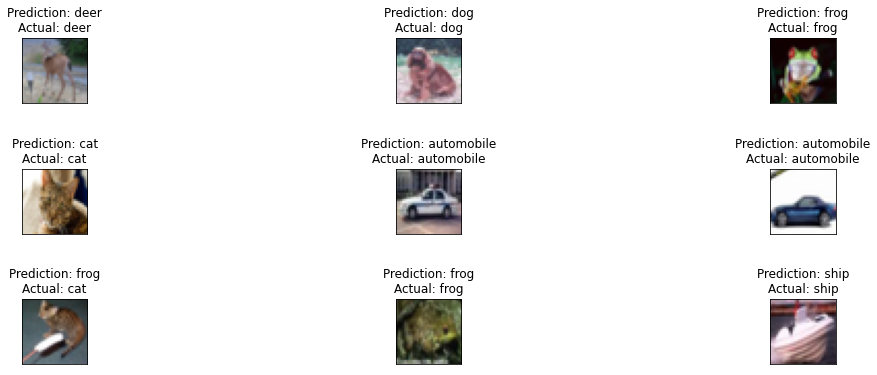

In [32]:
fig , axs = plt.subplots(3, 3, figsize = (19,6))
fig.subplots_adjust(hspace = 1)
axs = axs.flatten()
for i, img in enumerate(batch):
  for key, value in class_labels.items():
    if class_result[i]==key:
      title = 'Prediction: {}\nActual: {}'.format(class_labels[key], class_labels[labels[i]])
      axs[i].set_title(title)
      axs[i].axes.get_xaxis().set_visible(False)
      axs[i].axes.get_yaxis().set_visible(False)
    axs[i].imshow(img)
plt.show()